In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from scipy import stats
import os
import numpy as np
import glob
from scipy.stats import gaussian_kde
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
path = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Step6'

In [3]:
AllData = pd.read_csv(path + "\\" + 'AllLight_EveryMoth.csv')
AllData.head()

,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
0,0,0,20377,20713,NaN,NaN,0,L0.1_c-3_m10
1,1,1,39912,41054,NaN,NaN,1,L0.1_c-3_m10
2,2,2,67784,68084,NaN,NaN,2,L0.1_c-3_m10
3,3,3,68158,69028,NaN,NaN,3,L0.1_c-3_m10
4,4,4,26059,27412,NaN,NaN,0,L0.1_c-3_m12


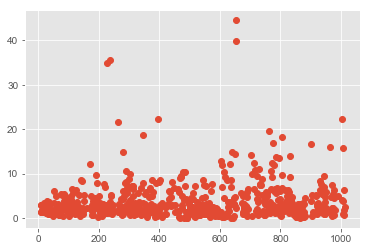

In [4]:
plt.plot(AllData.DiscoveryTime/100, 'o')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


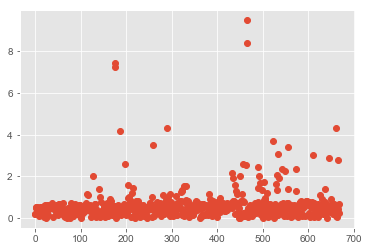

In [5]:
AllData_notnull = AllData[AllData.DiscoveryTime.notnull()]
z = np.abs(stats.zscore(AllData_notnull.DiscoveryTime.values))
outlier_ID = z > 5
plt.plot(z, 'o') 

AllData_notnull['zscore'] = z
AllData_notnull['outlier_ID'] = outlier_ID

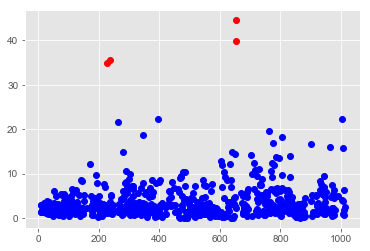

In [6]:
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == True]/100, 'o', color = 'red')
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == False]/100, 'o', color = 'blue')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


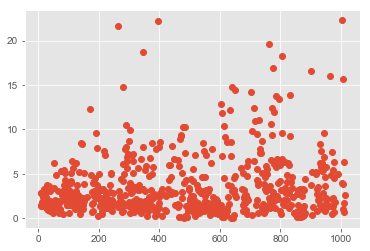

In [7]:
notoutliers = AllData_notnull[AllData_notnull.outlier_ID == False]
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100, axis = 'index')
plt.plot(notoutliers['DiscoveryTime'], 'o')

Text(0.5, 0, 'Occurance')

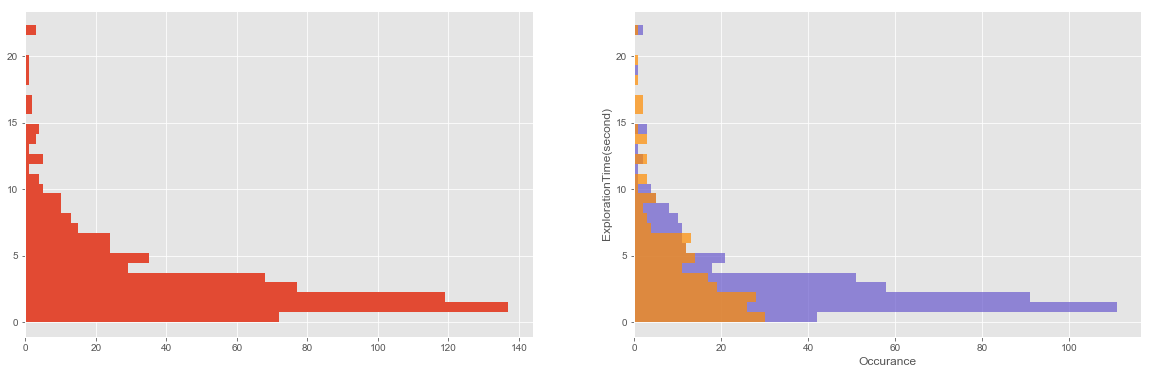

In [8]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

In [9]:
len(bins)

31

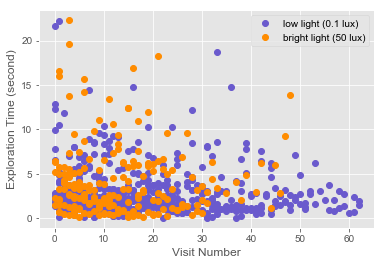

In [10]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [11]:
# BinnedDataSet
# binsize = 10
# new_column = binLabel 

notoutliers['binLabel'] = ['0-4' if value <=4 
                           else ('5-19' if (value > 4) & (value <= 19) else '20-30' if (value > 19) & (value <= 29) else '30andAbove') 
                           for value in notoutliers['trialNum']]

notoutliers['lightLevel'] = ['low' if 'L0.1' in value 
                           else 'high' for value in notoutliers['name']]

notoutliers.head()

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,binLabel,lightLevel
7,7,7,45940,52780,46222.0,2.82,0,L0.1_c-3_m20,0.181742,False,0-4,low
8,8,8,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.179421,False,0-4,low
9,9,9,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.529907,False,0-4,low
10,10,10,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.499733,False,0-4,low
11,11,11,77368,78421,77499.0,1.31,4,L0.1_c-3_m20,0.532228,False,0-4,low


In [12]:
notoutliers.name.unique()

array(['L0.1_c-3_m20', 'L0.1_c-3_m21', 'L0.1_c-3_m22', 'L0.1_c-3_m25',
       'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34', 'L0.1_c-3_m38',
       'L0.1_c-3_m40', 'L0.1_c-3_m41', 'L0.1_c-3_m43', 'L0.1_c-3_m44',
       'L0.1_c-3_m45', 'L0.1_c-3_m46', 'L0.1_c-3_m47', 'L0.1_c-3_m49',
       'L0.1_c-3_m50', 'L0.1_c-3_m54', 'L0.1_c-3_m57', 'L0.1_c-3_m5',
       'L0.1_c-3_m8', 'L50_c-3_m10', 'L50_c-3_m12', 'L50_c-3_m13',
       'L50_c-3_m14', 'L50_c-3_m15', 'L50_c-3_m21', 'L50_c-3_m22',
       'L50_c-3_m26', 'L50_c-3_m32', 'L50_c-3_m37', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m49', 'L50_c-3_m51', 'L50_c-3_m6',
       'L50_c-3_m9'], dtype=object)

In [13]:
notoutliers.binLabel.unique()

array(['0-4', '5-19', '20-30', '30andAbove'], dtype=object)

In [14]:
first_3_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values)
first_10_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values)
visits_15thru20_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values)
first_20_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values)
first_30_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)
all_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values)

In [15]:
first_3_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values)
first_10_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values)
visits_15thru20_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values)
first_20_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values)
first_30_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)
all_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values)

In [16]:
#first 3 visits
print('low visits',first_3_low), print('high visits',first_3_high)

low visits 152
high visits 88


(None, None)

In [17]:
#first 5 visits
print('low visits',first_5_low), print('high visits',first_5_high)

low visits 159
high visits 85


(None, None)

In [18]:
#first 10 visits
print('low visits',first_10_low), print('high visits',first_10_high)

low visits 133
high visits 70


(None, None)

In [19]:
#Visits 15-25
print('low visits',visits_15thru20_low), print('high visits',visits_15thru20_high)

low visits 92
high visits 50


(None, None)

In [20]:
#first 20 visits
print('low visits',first_20_low), print('high visits',first_20_high)

low visits 92
high visits 50


(None, None)

In [21]:
#first 30 visits
print('low visits',first_30_low), print('high visits',first_30_high)

low visits 86
high visits 37


(None, None)

In [22]:
#all visits
print('low visits',all_low), print('high visits',all_high)

low visits 78
high visits 23


(None, None)

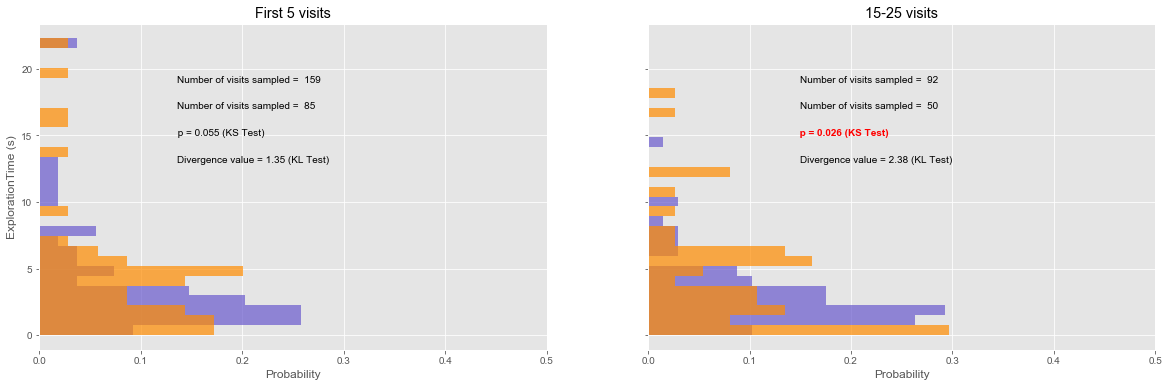

In [23]:
fig, ax = plt.subplots(1,2, figsize = (20,6), sharex = True, sharey = True)
ax = ax.ravel()


hist_5_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum <= 4)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_5_Highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum <= 4)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[0].set_title('First 5 visits')
ax[0].text(0.136, 19, 'Number of visits sampled =  ' + str(first_5_low))
ax[0].text(0.136, 17, 'Number of visits sampled =  ' + str(first_5_high))
ax[0].text(0.1335, 15, ' p = 0.055 (KS Test)', color = 'k' )
ax[0].text(0.136, 13, 'Divergence value = 1.35 (KL Test)')

hist_15to25_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                      (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_15to25_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[1].set_title('15-25 visits')
ax[1].text(0.15, 19, 'Number of visits sampled =  ' + str(visits_15thru20_low))
ax[1].text(0.15, 17, 'Number of visits sampled =  ' + str(visits_15thru20_high))
ax[1].text(0.147, 15, ' p = 0.026 (KS Test)', color = 'r', weight = 'bold' )
ax[1].text(0.15, 13, 'Divergence value = 2.38 (KL Test)')

# hist_all_lowlight,_, _ = ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
#           orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# hist_all_highlight, _, _ =ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
#           orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
# ax[2].set_title('All visits')
# ax[2].text(0.136, 15, ' p = 0.055 (KS Test)', color = 'r' )
# ax[2].text(0.14, 13, 'Divergence value = 1.66 (KL Test)')

ax[0].set_xlim(0, .5)
ax[0].set_ylabel('ExplorationTime (s)')
ax[0].set_xlabel('Probability')
ax[1].set_xlabel('Probability')
# ax[2].set_xlabel('Probability')
outpath_figg = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Stats'
# plt.savefig(outpath_figg + "\\" + 'Stats_Plot_First5Visits_vs_15-25Visits.png')
# if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

In [24]:
# fig, ax = plt.subplots(1,2, figsize = (20,6), sharex = True, sharey = True)
# ax = ax.ravel()


# hist_5_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
#                                      (notoutliers.binLabel == '0-4')].values,
#            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# hist_5_Highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                      (notoutliers.binLabel == '0-4')].values, 
#            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
# ax[0].set_title('First 5 visits')
# ax[0].text(0.1335, 15, ' p = 0.055 (KS Test)', color = 'k' )
# ax[0].text(0.136, 13, 'Divergence value = 1.35 (KL Test)')
# hist_20_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
#                                       (notoutliers.binLabel != '20-30') & (notoutliers.binLabel != '30andAbove')].values,
#            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# hist_20_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                      (notoutliers.binLabel != '20-30') & (notoutliers.binLabel != '30andAbove')].values, 
#            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
# ax[1].set_title('0-20 visits')
# ax[1].text(0.147, 15, ' p = 0.20 (KS Test)', color = 'k' )
# ax[1].text(0.15, 13, 'Divergence value = 1.38 (KL Test)')

# # hist_all_lowlight,_, _ = ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
# #           orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# # hist_all_highlight, _, _ =ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
# #           orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
# # ax[2].set_title('All visits')
# # ax[2].text(0.136, 15, ' p = 0.055 (KS Test)', color = 'r' )
# # ax[2].text(0.14, 13, 'Divergence value = 1.66 (KL Test)')

# ax[0].set_xlim(0, .5)
# ax[0].set_ylabel('ExplorationTime (s)')
# ax[0].set_xlabel('Probability')
# ax[1].set_xlabel('Probability')
# # ax[2].set_xlabel('Probability')
# outpath_figg = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Stats'
# # plt.savefig(outpath_figg + "\\" + 'Stats_Plot_First5Visits_vs_0-20Visits.png')
# # if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

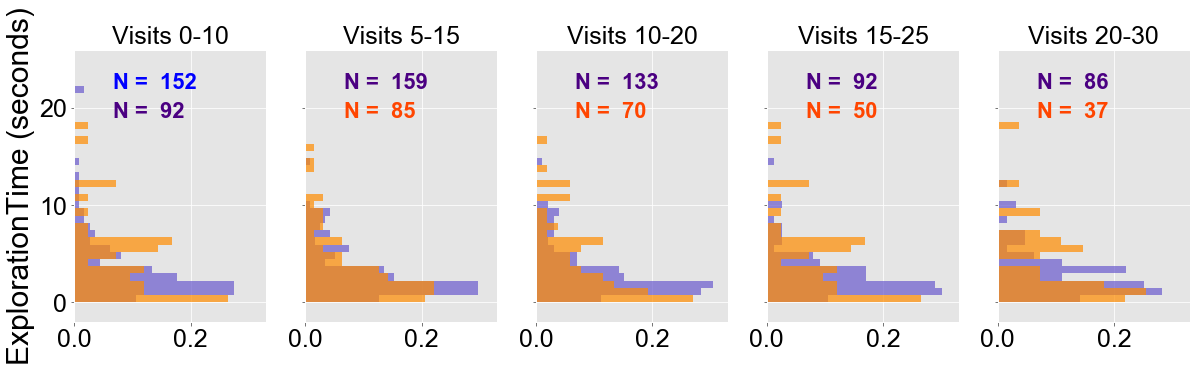

In [28]:
fig, ax = plt.subplots(1,5, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_03_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_03_highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_05_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_05_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_10_lowlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_10_highlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

hist_20_lowlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                       (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20_highlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


# # hist_10to20_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
# #                                       (notoutliers.trialNum > 9) & (notoutliers.trialNum <= 19)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# # hist_10to20_highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
# #                                      (notoutliers.trialNum > 9) & (notoutliers.trialNum <= 19)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

# # hist_15to25_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
# #                                       (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# # hist_15to25_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
# #                                      (notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

# # hist_20to30_lowlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
# #                                       (notoutliers.trialNum > 19) & (notoutliers.trialNum <= 29)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# # hist_20to30_highlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
# #                                      (notoutliers.trialNum > 19) & (notoutliers.trialNum <= 29)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

# # hist_25to35_lowlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
# #                                       (notoutliers.trialNum > 24) & (notoutliers.trialNum <= 34)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# # hist_25to35_highlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
# #                                      (notoutliers.trialNum > 24) & (notoutliers.trialNum <= 34)].values,
# #            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

         
    
hist_30_lowlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_30_highlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


# hist_all_lowlight, _, _ = ax[5].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
#                                       (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values,
#            bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
# hist_all_highlight, _, _ = ax[5].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                       (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values, 
#            bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

ax[0].set_title('Visits 0-10', size = 25)
ax[1].set_title('Visits 5-15', size = 25)
ax[2].set_title('Visits 10-20', size = 25)
ax[3].set_title('Visits 15-25', size = 25)
ax[4].set_title('Visits 20-30', size = 25)
# ax[5].set_title('Visits 25-35', size = 20)                                         



ax[0].set_ylim(-2, 26)
ax[0].set_ylabel('ExplorationTime (seconds)', size = 30, color = 'k')
ax[0].set_xlim(0,.33)
# ax[0].text(.86,-7,'Probability occurance', size = 20)
ax[0].tick_params(labelsize = 25, labelcolor = 'k')
ax[1].tick_params(labelsize = 25, labelcolor = 'k')
ax[2].tick_params(labelsize = 25, labelcolor = 'k')
ax[3].tick_params(labelsize = 25, labelcolor = 'k')
ax[4].tick_params(labelsize = 25, labelcolor = 'k')
# ax[5].tick_params(labelsize = 20, labelcolor = 'k')


ax[0].text(0.067, 22, 'N =  ' + str(first_3_low), color = 'indigo', weight = 'bold', size = 22)
ax[0].text(0.067, 19, 'N =  ' + str(first_3_high), color = 'orangered', weight = 'bold', size = 22)


ax[1].text(0.067, 22, 'N =  ' + str(first_5_low), color = 'indigo', weight = 'bold', size = 22)
ax[1].text(0.067, 19, 'N =  ' + str(first_5_high), color = 'orangered', weight = 'bold', size = 22)


ax[2].text(0.067, 22, 'N =  ' + str(first_10_low),  color = 'indigo', weight = 'bold',size = 22)
ax[2].text(0.067, 19, 'N =  ' + str(first_10_high), color = 'orangered', weight = 'bold', size = 22)


ax[3].text(0.067, 22, 'N =  ' + str(first_20_low), color = 'indigo', weight = 'bold', size = 22)
ax[3].text(0.067, 19, 'N =  ' + str(first_20_high), color = 'orangered', weight = 'bold', size = 22)


ax[4].text(0.067, 22, 'N =  ' + str(first_30_low), color = 'indigo', weight = 'bold', size = 22)
ax[4].text(0.067, 19, 'N =  ' + str(first_30_high), color = 'orangered', weight = 'bold', size = 22)


# ax[5].text(0.067, 22, 'N =  ' + str(all_low), color = 'indigo', weight = 'bold', size = 15)
# ax[5].text(0.067, 20, 'N =  ' + str(all_high), color = 'orangered', weight = 'bold', size = 15)
# ax[5].text(0.067, 18, ' p = 0.005 (KS Test)', color = 'r', weight = 'bold', size = 15 )
# ax[5].text(0.07, 16, 'Divergence = -0.01 (KL Test)', size = 15)
                                         
outpath_figg = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Stats'
plt.savefig(outpath_figg + "\\" + 'Visits_0-30.png')
# if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

In [26]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
hist_03_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_03_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_05_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_05_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

hist_20_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_20_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_'))  & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

hist_10_lowlight, _, _  = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_10_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

# hist_15to25_lowlight, _, _  = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
#                                      (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
#         bins, density=True, histtype='step', color = 'slateblue',
#         cumulative=True, label='lowLight', orientation = 'horizontal')

# hist_15to25_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                      (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
#         bins, density=True, histtype='step', color = 'darkorange',
#         cumulative=True, label='highLight', orientation = 'horizontal')

# hist_20to30_lowlight, _, _  = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
#                                      (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
#         bins, density=True, histtype='step', color = 'slateblue',
#         cumulative=True, label='lowLight', orientation = 'horizontal')

# hist_20to30_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                      (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
#         bins, density=True, histtype='step', color = 'darkorange',
#         cumulative=True, label='highLight', orientation = 'horizontal')

# hist_25to35_lowlight, _, _  = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
#                                      (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values,
#         bins, density=True, histtype='step', color = 'slateblue',
#         cumulative=True, label='lowLight', orientation = 'horizontal')

# hist_25to35_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
#                                      (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values,
#         bins, density=True, histtype='step', color = 'darkorange',
#         cumulative=True, label='highLight', orientation = 'horizontal')

hist_30_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_30_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_all_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_') & 
                                     (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_all_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_') & 
                                     (notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

In [70]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
     epsilon = 1e-20
# You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     
     divergence = np.sum(P*np.log(P/Q))
      
     return divergence

In [ ]:
#Divergence for first 3 visits
KL(hist_03_lowlight, hist_03_highlight, 1e-30)

In [ ]:
#Divergence for first 5 visits
KL(hist_05_lowlight, hist_05_highlight, 1e-30)

In [ ]:
#Divergence for first 20 visits
KL(hist_20_lowlight, hist_20_highlight, 1e-30)

In [ ]:
#Divergence visits 0-10
KL(hist_10_lowlight, hist_10_highlight, 1e-30)

In [ ]:
#Divergence visits 15-25
# KL(hist_15to25_lowlight, hist_15to25_highlight, 1e-30)

In [ ]:
#Divergence visits 20-30
# KL(hist_20to30_lowlight, hist_20to30_highlight, 1e-30)

In [ ]:
#Divergence visits 25-35
# KL(hist_25to35_lowlight, hist_25to35_highlight, 1e-30)

In [ ]:
#Divergence for first 30 visits
KL(hist_30_lowlight, hist_30_highlight, 1e-30)

In [ ]:
#Divergence for all visits
KL(hist_all_lowlight, hist_all_highlight, 1e-30)

In [ ]:
#Significance for first 3 visits
stats.ks_2samp(hist_03_highlight,hist_03_lowlight)

In [ ]:
#Significance for first 5 visits
stats.ks_2samp(hist_05_highlight,hist_05_lowlight)

In [ ]:
#Significance for first 20 visits
stats.ks_2samp(hist_20_highlight,hist_20_lowlight)

In [ ]:
#Significance for visits 10
stats.ks_2samp(hist_10_highlight,hist_10_lowlight)

In [ ]:
#Significance for visits 15-25
# stats.ks_2samp(hist_15to25_highlight,hist_15to25_lowlight)

In [ ]:
#Significance for visits 20-30
# stats.ks_2samp(hist_20to30_highlight,hist_20to30_lowlight)

In [ ]:
#Significance for visits 25-35
# stats.ks_2samp(hist_25to35_highlight,hist_25to35_lowlight)

In [ ]:
#Significance for first 30 visits
stats.ks_2samp(hist_30_highlight,hist_30_lowlight)

In [ ]:
#Significance for all visits
stats.ks_2samp(hist_all_highlight,hist_all_lowlight)

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="lightLevel", y="DiscoveryTime", hue="binLabel", data=notoutliers, palette="Set1")
# sns.plt.show()

In [ ]:
test = notoutliers

In [ ]:
First_3 = notoutliers[(notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)]
First_5 = notoutliers[(notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)]
First_10 = notoutliers[(notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)]
# Visits_15thru25 = notoutliers[(notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)]
First_20 = notoutliers[(notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)] 
First_30 = notoutliers[(notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)]
All = notoutliers[(notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)]
#look at data to see better lateTrial numbers

In [ ]:
def kde_scipy(x):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x)
    return kde

In [ ]:
alldata = First_3.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [ ]:
for flower, df in First_3.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in First_5.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
# alldata = First_10.DiscoveryTime/100
# _,bins = np.histogram(alldata, bins = 100, density = True)
# bin_center = 0.5*(bins[1:]+bins[:-1])
# bin_center = np.linspace(0,60,200)
# delta = np.diff(bin_center)[0]

In [ ]:
for flower, df in First_10.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
# for flower, df in Visits_15thru25.groupby('lightLevel'):
#     plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
#     plt.legend()

In [ ]:
for flower, df in First_20.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in First_30.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in All.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
First_3_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_5_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_10_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
# Visits_15thru25_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_20_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_30_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
All_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
SampleSize = pd.DataFrame(index = ['Low', 'High'], columns = ['3', '5', '10', '15-25', '20', '30', 'all'], dtype = 'float')

In [ ]:
from scipy.stats import gaussian_kde

plt.set_cmap('Spectral')
# f1, ax1 = plt.subplots(1,2,sharex = True, sharey = True, figsize = (15,20))
f2, ax2 = plt.subplots(1,5,sharex = True, sharey = True, figsize = (20,5))


offset = 0
for f, df in First_3.groupby('lightLevel', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'3'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_3_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        
        d = 'darkred'
#     ax1[0].plot(bin_center, hist)
    p = ax2[0].plot(temp, bin_center, label = f, color = c)
    ax2[0].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[0].legend()
    ax2[0].set_title('Visits 0-10')
offset = 0
for f, df in First_5.groupby('lightLevel', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'5'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_5_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        d = 'darkred'
        
#     ax1[1].plot(bin_center, hist)
    p = ax2[1].plot(temp, bin_center,  label = f, color = c)
    ax2[1].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[1].legend()
    ax2[1].set_title('Visits 5-15')
    
offset = 0
for f, df in First_10.groupby('lightLevel', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'10'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_10_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        
        d = 'darkred'
#     ax1[0].plot(bin_center, hist)
    p = ax2[2].plot(temp, bin_center, label = f, color = c)
    ax2[2].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[2].legend()
    ax2[2].set_title('Visits 10-20')
offset = 0
for f, df in First_20.groupby('lightLevel', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'20'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_20_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        d = 'darkred'
        
#     ax1[1].plot(bin_center, hist)
    p = ax2[3].plot(temp, bin_center, label = f, color = c)
    ax2[3].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[3].legend()
    ax2[3].set_title('Visits 15-25')
    
offset = 0
for f, df in First_30.groupby('lightLevel', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'30'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_30_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        
        d = 'darkred'
#     ax1[0].plot(bin_center, hist)
    p = ax2[4].plot(temp, bin_center, label = f, color = c)
    ax2[4].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[4].legend()
    ax2[4].set_title('Visits 20-30')
offset = 0
# for f, df in All.groupby('lightLevel', sort = True):

#     data = df.DiscoveryTime    
#     SampleSize.loc[f,'all'] = len(data)
#     kde = kde_scipy(data)
    
#     temp = kde.pdf(bin_center)
#     temp /= delta * np.sum(temp)
#     All_df.loc[:,f]=temp
    
#     if f.startswith("low"):
#         c = 'indigo'
        
#         d = 'midnightblue'
#     elif f.startswith("high"):
#         c = 'darkorange'
        
#         d = 'darkred'
        
# #     ax1[1].plot(bin_center, hist)
#     p = ax2[5].plot(temp, bin_center, label = f, color = c)
#     ax2[5].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
#     offset+=-0.01
# #     ax2[5].legend()
#     ax2[5].set_title('Visits 25-35')

ax2[0].set_ylabel('Exploration Time (seconds)', size = 30, color = 'k')
ax2[0].set_ylim(-3,26)

ax2[0].text(.645,-9,'Probability occurance', size = 30)
ax2[0].tick_params(labelsize = 25, labelcolor = 'k')
ax2[1].tick_params(labelsize = 25, labelcolor = 'k')
ax2[2].tick_params(labelsize = 25, labelcolor = 'k')
ax2[3].tick_params(labelsize = 25, labelcolor = 'k')
ax2[4].tick_params(labelsize = 25, labelcolor = 'k')
ax2[0].set_xlim(-.04,0.26)


ax2[0].text(0.017, 22, ' p = 0.11 (KS Test)', color = 'k', weight = 'bold', size = 12 )
ax2[0].text(0.02, 20, 'Divergence = 1.2 (KL Test)', size = 12)
ax2[1].text(0.017, 22, ' p = 0.11 (KS Test)', color = 'k', weight = 'bold', size = 12 )
ax2[1].text(0.02, 20, 'Divergence = 0.75 (KL Test)', size = 12)
ax2[2].text(0.017, 22, ' p = 0.026 (KS Test)', color = 'r', weight = 'bold', size = 13 )
ax2[2].text(0.02, 20, 'Divergence = 1.49 (KL Test)', size = 12)
ax2[3].text(0.017, 22, ' p = 0.026 (KS Test)', color = 'r', weight = 'bold', size = 13 )
ax2[3].text(0.02, 20, 'Divergence = 2.45 (KL Test)', size = 12)
ax2[4].text(0.017, 22, ' p = 0.003 (KS Test)', color = 'r', weight = 'bold', size = 13)
ax2[4].text(0.02, 20, 'Divergence = 1.46 (KL Test)', size = 12)

# ax2[5].tick_params(labelsize = 14, labelcolor = 'k')
# ax2[2].set_xlabel('Exploration Time (seconds)')
# ax2[3].set_xlabel('Exploration Time (seconds)')
# ax2[4].set_xlabel('Exploration Time (seconds)')
# ax2[5].set_xlabel('Exploration Time (seconds)')

plt.savefig(outpath_figg + "\\" + 'Visits0-30_Stats_Plot_PDE.png')

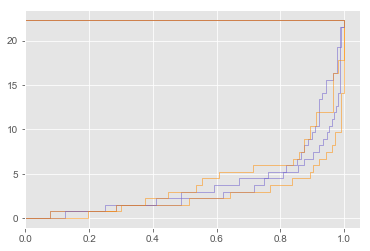

In [83]:
#add a comparison between the early and late visits within a light level (one plot comparing two time points with similar N size maybe 0-10 vs 15-25?)
hist_early_lowlight_stat, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_late_lowlight_stat, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_early_highlight_stat, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_late_highlight_stat, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

Text(0.067, 19, 'Late N =  50')

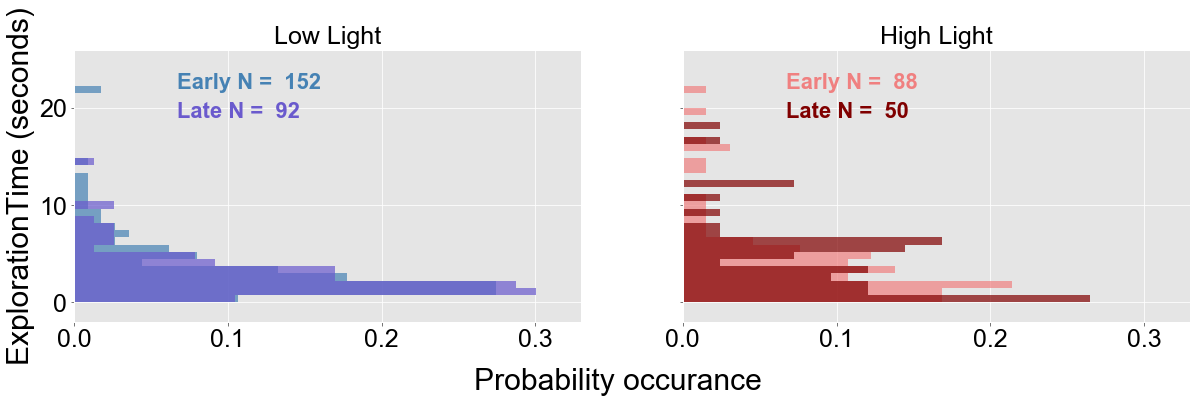

In [80]:
#add a comparison between the early and late visits within a light level (one plot comparing two time points with similar N size maybe 0-10 vs 15-25?)fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_early_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'steelblue', density = True)
hist_late_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_early_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'lightcoral', density = True)
hist_late_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'maroon', density = True)

ax[0].set_title('Low Light', size = 25)
ax[1].set_title('High Light', size = 25)
                                      



ax[0].set_ylim(-2, 26)
ax[0].set_ylabel('ExplorationTime (seconds)', size = 30, color = 'k')
ax[0].set_xlim(0,.33)
ax[0].text(.26,-9,'Probability occurance', size = 30)
ax[0].tick_params(labelsize = 25, labelcolor = 'k')
ax[1].tick_params(labelsize = 25, labelcolor = 'k')



ax[0].text(0.067, 22, 'Early N =  ' + str(first_3_low), color = 'steelblue', weight = 'bold', size = 22)
ax[0].text(0.067, 19, 'Late N =  ' + str(first_20_low), color = 'slateblue', weight = 'bold', size = 22)


ax[1].text(0.067, 22, 'Early N =  ' + str(first_3_high), color = 'lightcoral', weight = 'bold', size = 22)
ax[1].text(0.067, 19, 'Late N =  ' + str(first_20_high), color = 'maroon', weight = 'bold', size = 22)


In [84]:
#learning comparing the early and later visits lower light. A negative value means the second thing is less ?? (that's how it is between light levels)
KL(hist_early_lowlight_stat, hist_late_lowlight_stat, 1e-30), stats.ks_2samp(hist_early_lowlight_stat,hist_late_lowlight_stat)

(-0.7592557544869052,
 Ks_2sampResult(statistic=0.5333333333333333, pvalue=0.00020211742020648208))

In [85]:
#learning comparing the early and later visits higher light
KL(hist_early_highlight_stat, hist_late_highlight_stat, 1e-30), stats.ks_2samp(hist_early_highlight_stat,hist_late_highlight_stat)

(0.28535335096688713,
 Ks_2sampResult(statistic=0.19999999999999996, pvalue=0.5371995394073505))